<font size = '5'> <center>**Logistic Regression from scratch**</center> </font>

In [383]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat
import scipy.optimize as opt
from scipy import stats

In [305]:
#import data
current_dir = os.getcwd()

#data directory
data_dir = current_dir + '\\data'

#dataset
data = loadmat(data_dir + '\\fisherdata.mat')

#data
cat1 = data['data1']
cat2 = data['data2']

#categories
cat1_y = np.ones([len(cat1), 1])
cat2_y = np.zeros([len(cat2), 1])

#add the category 
dataset1 = np.append(cat1, cat1_y, 1)
dataset2 = np.append(cat2, cat2_y, 1)

#combine the data and shuffle
data = np.vstack([dataset1, dataset2])
np.random.seed(1)
np.random.shuffle(data)

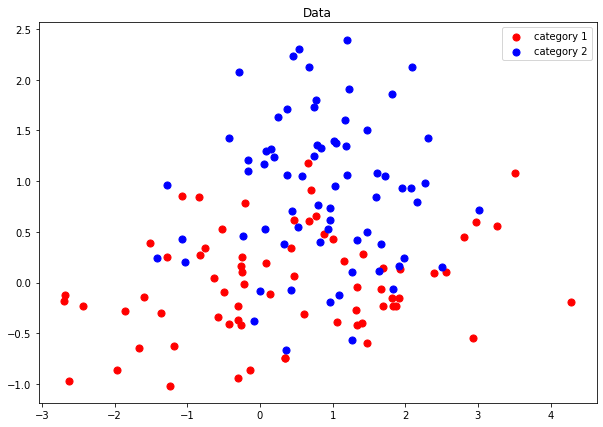

In [306]:
#plot the data
plt.figure(figsize = (10, 7))
plt.scatter(data[data[:, 2] == 1][:, 0], data[data[:, 2] == 1][:, 1], s = 50, color = 'r', label = 'category 1')
plt.scatter(data[data[:, 2] == 0][:, 0], data[data[:, 2] == 0][:, 1], s = 50, color = 'b', label = 'category 2')
plt.title('Data')
plt.legend()
plt.show()

**Logistic Regression using gradient descent**

- Forward propagation
- Calculate the cost


In [307]:
#sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

#initialize the parameters
def initialize_parameters():
    
    w = np.random.normal([2, 1])
    b = 0
    
    return w, b

#cost function
def calculate_cost(y_true, y_pred):
    
    #length of the predictions
    m = len(y_true)
    
    #calculate cost
    cost = np.sum(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))
    cost = cost/m
    
    return cost

In [308]:
def forward_propagation(w, b, X, Y):
    
    #calculate z
    z = X @ w.T + b
    
    #calculate the activation using the sigmoid function
    y_hat = sigmoid(z)
    
    #calculate the cost 
    cost = calculate_cost(Y, y_hat)
    
    return y_hat, cost
    
def backward_propagation(y_pred, Y, X):
    
    #calculate m
    m = len(Y)
    
    #calculate the derivatives
    dw = 1/m * ((y_pred - Y) @ X)
    db = 1/m * np.sum(y_pred - Y)
    
    return dw, db

In [309]:
#funciton to make predictions
def predict(w, b, X, Y):
    
    #calculate the y predictions
    y_hat,_ = forward_propagation(w, b, X, Y)
    
    #append the values
    y_pred = []
    
    #count correct 
    count = 0
    
    for y in range(len(y_hat)):
        
        #make prediction
        prediction = 1.0 if y_hat[y] > 0.5 else 0.0
        y_pred.append(prediction)
        
        if prediction == int(Y[y]):
            count += 1
            
        
    #print prediction accuracy
    print('Prediction accuracy is {} '.format(np.round(count/len(Y)*100), 5), '%')    
    
    return y_pred

In [310]:
#function to plot 
def plot_results(w, b, X, Y, Y_pred, title = None, figsize = (10, 7)):
    
    x_vals = np.arange(np.min(X), np.max(X), 0.1)
    y_vals = (- w[0] * x_vals - b)/ w[1]

    plt.figure(figsize = figsize)
    
    for i in range(len(X)):
        
        if (Y_pred[i] == Y[i]) and (Y[i] == 1):
            
            plt.scatter(X[i, 0], X[i, 1], s = 50, color = 'r')
            
        if (Y_pred[i] == Y[i]) and (Y[i] == 0):
            
            plt.scatter(X[i, 0], X[i, 1], s = 50, color = 'b')
            
        if (Y_pred[i] != Y[i]) and (Y[i] == 1):
            
            plt.scatter(X[i, 0], X[i, 1], s = 50, facecolor = 'None', edgecolor = 'r')
            
        if (Y_pred[i] != Y[i]) and (Y[i] == 0):
            
            plt.scatter(X[i, 0], X[i, 1], s = 50, facecolor = 'None', edgecolor = 'b')
    
    if title:
        plt.title(title)
        
    plt.plot(x_vals, y_vals, color = 'k', markersize = '20', linestyle = '--')
    plt.show()    
    

In [311]:
def plot_sigmoid(w, b, X, Y, Y_pred, title = None, figsize = (10, 7)):
           
    #calculate z
    z = X @ w.T + b
    
    #xmin and x max values
    z_min = np.min(z)
    z_max = np.max(z)
    z_vals = np.arange(z_min, z_max, 0.1)
    
    #calcualte sigmoid
    a = sigmoid(z_vals)
    
    #plot sigmoid
    plt.figure(figsize = (figsize))
    plt.plot(z_vals, a, color = 'k', markersize = 10)
    
    for i in range(len(X)):
        
        if (Y_pred[i] == Y[i]) and (Y[i] == 1):
            
            plt.scatter(z[i], Y_pred[i], s = 50, color = 'r', alpha = 0.2)
            
        if (Y_pred[i] == Y[i]) and (Y[i] == 0):
            
            plt.scatter(z[i], Y_pred[i], s = 50, color = 'b', alpha = 0.2)
            
        if (Y_pred[i] != Y[i]) and (Y[i] == 1):
            
            plt.scatter(z[i], Y_pred[i], s = 50, facecolor = 'None', edgecolor = 'r')
            
        if (Y_pred[i] != Y[i]) and (Y[i] == 0):
            
            plt.scatter(z[i], Y_pred[i], s = 50, facecolor = 'None', edgecolor = 'b')
        
    if title:
        plt.title(title)
    
    plt.show()

In [374]:
def optimize_parameters(X, Y, learning_rate = 0.01, num_its = 1000):
    
    #append values
    costs, w1, w2, constant = [], [], [], []
    
    
    #initialize parameters
    w, b = initialize_parameters()
    
    for i in range(num_its):
        
        #propagate forward
        y_hat, cost = forward_propagation(w, b, X, Y)
        
        #propagate backwards
        dw, db = backward_propagation(y_hat, Y, X)
        
        #collect the parameters
        costs.append(cost)
        w1.append(w[0])
        w2.append(w[1])
        constant.append(b)
        
        #update weights
        w = w - learning_rate * dw
        b = b - learning_rate * db
                
        #print cost and prediction accuracy
        if i % 500 == 0:
            
            print('------\n')
            print('After iteration {}'.format(i))
            print('Cost is ', cost)
            #find accuracy and predicted values
            y_preds = predict(w, b, X, Y)
            #plot results
            plot_results(w, b, X, Y, y_preds, 'Predictions and Decision Boundary', (4, 2))
            plot_sigmoid(w, b, X, Y, y_preds, 'Sigmoid function and predictions', (4, 2))
                        
    return w, b, costs, w1, w2, constant

------

After iteration 0
Cost is  1.7924971531478961
Prediction accuracy is 34.0  %


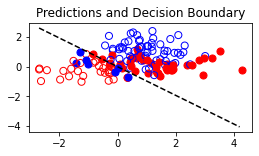

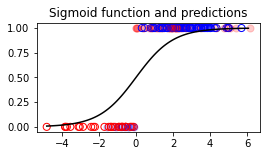

------

After iteration 500
Cost is  0.8365180772535128
Prediction accuracy is 29.0  %


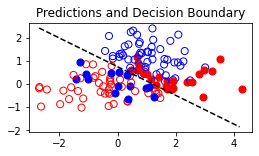

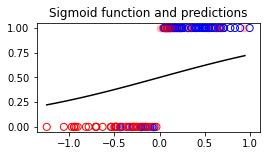

------

After iteration 1000
Cost is  0.6561412904715569
Prediction accuracy is 58.0  %


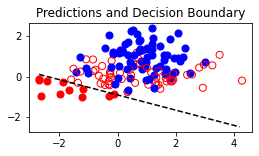

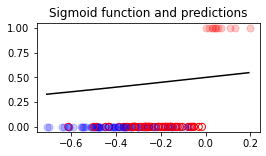

------

After iteration 1500
Cost is  0.590745333251929
Prediction accuracy is 67.0  %


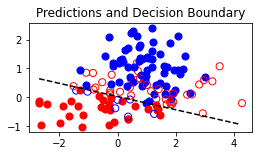

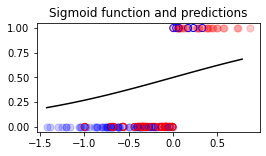

------

After iteration 2000
Cost is  0.5525248945178795
Prediction accuracy is 77.0  %


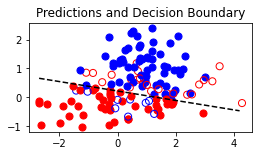

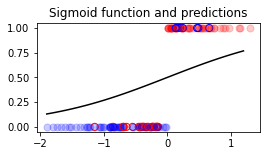

------

After iteration 2500
Cost is  0.5282660811363546
Prediction accuracy is 75.0  %


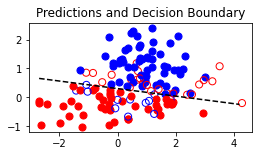

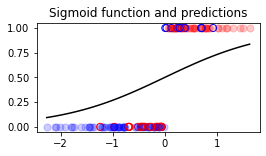

------

After iteration 3000
Cost is  0.5121939768843453
Prediction accuracy is 77.0  %


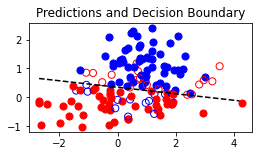

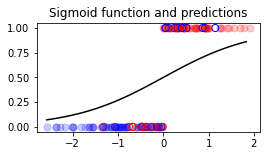

------

After iteration 3500
Cost is  0.5011638183281816
Prediction accuracy is 78.0  %


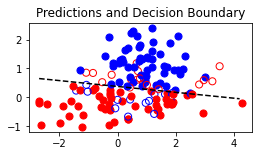

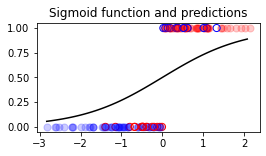

------

After iteration 4000
Cost is  0.4933686502595409
Prediction accuracy is 78.0  %


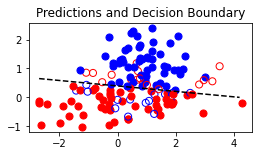

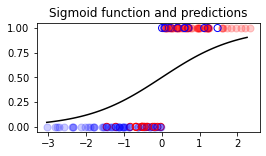

------

After iteration 4500
Cost is  0.4877250325005595
Prediction accuracy is 78.0  %


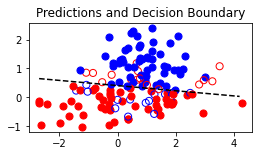

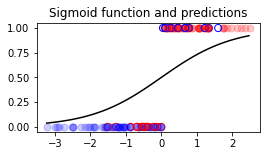

In [375]:
#run the algorith for 5000 iterations

#get X and Y data
X = data[:, :2]
Y = data[:, 2]

w, b, costs, w1, w2, constant = optimize_parameters(X, Y, learning_rate = 0.005, num_its = 5000)

In [376]:
#find accuracy and predicted values
y_preds = predict(w, b, X, Y)

Prediction accuracy is 77.0  %


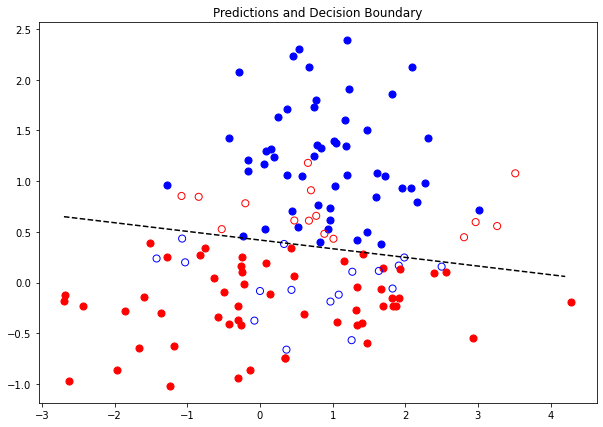

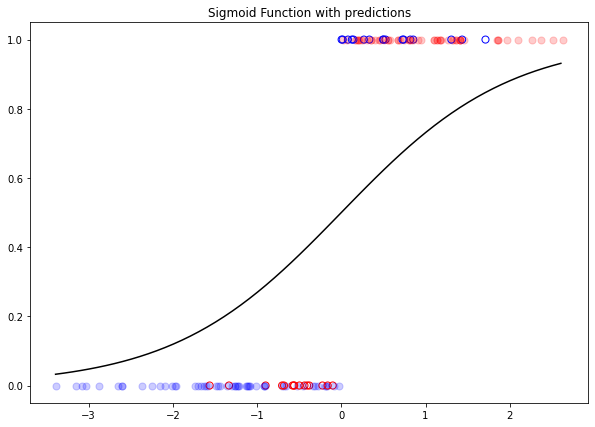

In [377]:
#plot results
plot_results(w, b, X, Y, y_preds, 'Predictions and Decision Boundary')
plot_sigmoid(w, b, X, Y, y_preds, title = 'Sigmoid Function with predictions')

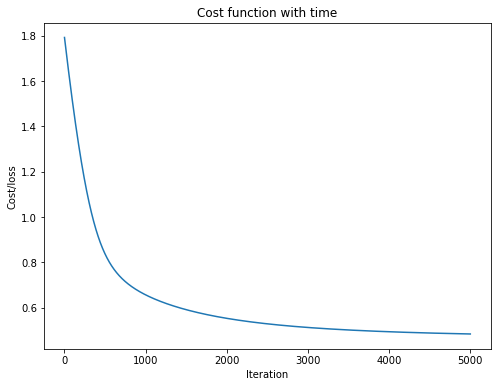

In [378]:
#cost
plt.figure(figsize = (8, 6))
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost/loss')
plt.title('Cost function with time')
plt.show()

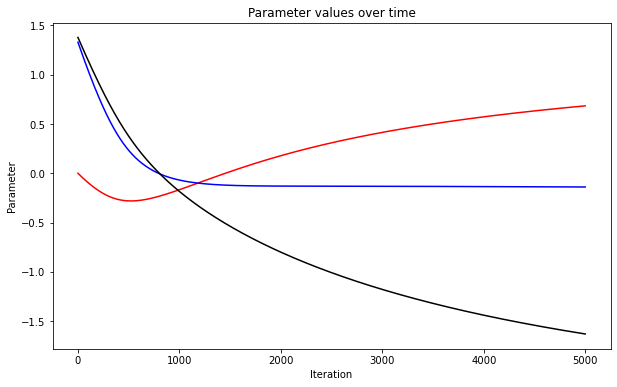

In [381]:
#plot the parameters with loss
plt.figure(figsize = (10, 6))
plt.plot(constant, color = 'r', label = 'b')
plt.plot(w1, color = 'b', label = 'w1')
plt.plot(w2, color = 'k', label = 'w2')
plt.xlabel('Iteration')
plt.ylabel('Parameter')
plt.title('Parameter values over time')
plt.show()


Logistic regression using maximum likelihood


In [384]:
#create a function to calculate the cost

def negative_log_likelihood(par, X, Y):
    
    #calculate the sigmoid
    Z = X @ par.T
        
    #cumulative probability distribution
    Y_pred = stats.norm.cdf(Z, par[0], par[1])
    
    #negative log likelihood
    nll = np.sum(-Y * np.log(Y_pred) - (1 - Y) * np.log(1 - Y_pred))
    
    return nll

In [385]:
#use fmin to find the optimal values
opt.fmin(negative_log_likelihood, x0 = [2, 2], args = (X, Y))

ValueError: operands could not be broadcast together with shapes (140,) (140,2) 

In [386]:
X @ param

array([[0.35841312, 0.4164864 ],
       [0.58678331, 0.32102519],
       [0.91654801, 0.52341007],
       [0.56202255, 0.83605236],
       [0.15873974, 0.34367206],
       [0.74046099, 0.79786666],
       [0.58567711, 0.32174016],
       [0.23483539, 0.34927561],
       [0.61610366, 0.64844227],
       [0.92416088, 0.53918016],
       [0.73647997, 0.7222213 ],
       [0.42328975, 0.40900114],
       [0.81343125, 0.81873083],
       [0.52149069, 0.5487439 ],
       [0.76040397, 0.5539397 ],
       [0.45978795, 0.74973863],
       [0.19412912, 0.55907313],
       [0.43586089, 0.54083042],
       [0.81307319, 0.35466614],
       [0.76876194, 0.91659109],
       [0.6686152 , 0.7131013 ],
       [0.39343049, 0.39873734],
       [0.84488063, 0.53681033],
       [0.18016738, 0.59648032],
       [0.8719868 , 0.46131153],
       [0.78093809, 0.5266126 ],
       [0.98640249, 0.4515915 ],
       [0.89710789, 0.68870513],
       [0.30428448, 0.56740267],
       [0.72511975, 0.45321617],
       [0.